<a href="https://colab.research.google.com/github/alexmarc55/AI---Homework/blob/main/Tema4ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
!pip install -q gdown

!gdown "https://drive.google.com/uc?id=1WO3yoK_Fd-v3JBLBCVNvZVZHfS5Un_Em"

Downloading...
From: https://drive.google.com/uc?id=1WO3yoK_Fd-v3JBLBCVNvZVZHfS5Un_Em
To: /content/strength_training_data.csv
100% 3.17k/3.17k [00:00<00:00, 8.37MB/s]


## Clasificare folosind KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('strength_training_data.csv')
df

,Bench_Press_kg,Squat_kg,Deadlift_kg,Body_Weight_kg,Strength_Level
0,83.4,91.6,90.9,75.0,Newbie
1,47.0,50.2,55.1,66.2,Newbie
2,69.7,70.8,74.7,60.8,Newbie
3,51.9,58.2,60.7,67.3,Newbie
4,55.8,65.3,71.0,84.5,Newbie
...,...,...,...,...,...
95,167.1,256.1,274.7,110.8,Elite
96,149.0,177.4,190.9,78.7,Elite
97,181.5,245.4,251.1,97.9,Elite
98,179.1,223.7,237.9,88.1,Elite


In [ ]:
X = df[['Bench_Press_kg', 'Squat_kg', 'Deadlift_kg', 'Body_Weight_kg']]
y = df['Strength_Level']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
fig = px.scatter_3d(df,
                    x='Bench_Press_kg',
                    y='Squat_kg',
                    z='Deadlift_kg',
                    color='Strength_Level',
                    title='Strength Training Data Distribution',
                    labels={'Bench_Press_kg': 'Bench Press (kg)',
                            'Squat_kg': 'Squat (kg)',
                            'Deadlift_kg': 'Deadlift (kg)'})

fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.88


In [ ]:
y_pred_full = knn.predict(X)

cm_full = confusion_matrix(y_encoded, y_pred_full)
labels = le.classes_

fig = px.imshow(cm_full,
                labels=dict(x="Predicted Label", y="True Label", color="Count"),
                x=labels,
                y=labels,
                text_auto=True,
                title="Confusion Matrix on Whole Dataset")
fig.show()

In [ ]:
new_user = np.array([[110, 160, 180, 92]]) # Bench Press = 110kg, Squat = 160kg, Deadlift = 180kg, Body Weight = 92kg
pred = knn.predict(new_user)
predicted_label = le.inverse_transform(pred)[0]
print("Predicted Level:", predicted_label)

Predicted Level: Advanced


In [ ]:
fig = px.scatter_3d(df,
                    x='Bench_Press_kg',
                    y='Squat_kg',
                    z='Deadlift_kg',
                    color='Strength_Level',
                    title='Strength Training Data with New User',
                    labels={'Bench_Press_kg': 'Bench Press (kg)',
                            'Squat_kg': 'Squat (kg)',
                            'Deadlift_kg': 'Deadlift (kg)'})

fig.add_trace(go.Scatter3d(x=[new_user[0][0]],
                           y=[new_user[0][1]],
                           z=[new_user[0][2]],
                           mode='markers',
                           marker=dict(color='red', size=10, symbol='diamond'),
                           name=f'New User ({predicted_label})'))

fig.show()

In [ ]:
df['Average_Lift_kg'] = df[['Bench_Press_kg', 'Squat_kg', 'Deadlift_kg']].mean(axis=1)

fig = px.scatter(df,
                 x='Average_Lift_kg',
                 y='Body_Weight_kg',
                 color='Strength_Level',
                 title='Average Lift vs. Body Weight',
                 labels={'Average_Lift_kg': 'Average Lift (kg)',
                         'Body_Weight_kg': 'Body Weight (kg)'})

new_user_avg_lift = new_user[0][:3].mean()
new_user_body_weight = new_user[0][3]

fig.add_trace(go.Scatter(x=[new_user_avg_lift],
                         y=[new_user_body_weight],
                         mode='markers',
                         marker=dict(color='red', size=10, symbol='diamond'),
                         name=f'New User ({predicted_label})'))

fig.show()

## Regresie folosind KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df = pd.read_csv('strength_training_data.csv')
df

,Bench_Press_kg,Squat_kg,Deadlift_kg,Body_Weight_kg,Strength_Level
0,83.4,91.6,90.9,75.0,Newbie
1,47.0,50.2,55.1,66.2,Newbie
2,69.7,70.8,74.7,60.8,Newbie
3,51.9,58.2,60.7,67.3,Newbie
4,55.8,65.3,71.0,84.5,Newbie
...,...,...,...,...,...
95,167.1,256.1,274.7,110.8,Elite
96,149.0,177.4,190.9,78.7,Elite
97,181.5,245.4,251.1,97.9,Elite
98,179.1,223.7,237.9,88.1,Elite


In [ ]:
X = df[['Bench_Press_kg', 'Squat_kg', 'Deadlift_kg']]
y = df['Body_Weight_kg']

In [ ]:
fig = px.scatter_3d(df,
                    x='Bench_Press_kg',
                    y='Squat_kg',
                    z='Deadlift_kg',
                    color='Body_Weight_kg',
                    title='Strength Training Data Distribution',
                    labels={'Bench_Press_kg': 'Bench Press (kg)',
                            'Squat_kg': 'Squat (kg)',
                            'Deadlift_kg': 'Deadlift (kg)'})

fig.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3, weights='uniform', metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [ ]:
new_user = np.array([[110, 160, 180]]) # Bench Press = 110kg, Squat = 160kg, Deadlift = 180kg
pred = knn.predict(new_user)
print("Predicted Weight:", pred[0])
predicted_body_weight = round(pred[0], 2)

Predicted Weight: 85.13333333333333


In [ ]:
fig = px.scatter_3d(df,
                    x='Bench_Press_kg',
                    y='Squat_kg',
                    z='Deadlift_kg',
                    color='Body_Weight_kg',
                    title='Strength Training Data with New User',
                    labels={'Bench_Press_kg': 'Bench Press (kg)',
                            'Squat_kg': 'Squat (kg)',
                            'Deadlift_kg': 'Deadlift (kg)'})

fig.add_trace(go.Scatter3d(x=[new_user[0][0]],
                           y=[new_user[0][1]],
                           z=[new_user[0][2]],
                           mode='markers',
                           marker=dict(color=[predicted_body_weight], size=10, symbol='diamond'),
                           name=f'New User ({predicted_body_weight})'))

fig.show()

In [ ]:
df['Average_Lift_kg'] = df[['Bench_Press_kg', 'Squat_kg', 'Deadlift_kg']].mean(axis=1)

fig = px.scatter(df,
                 x='Average_Lift_kg',
                 y='Body_Weight_kg',
                 color='Body_Weight_kg',
                 title='Average Lift vs. Body Weight',
                 labels={'Average_Lift_kg': 'Average Lift (kg)',
                         'Body_Weight_kg': 'Body Weight (kg)'})

new_user_avg_lift = new_user[0][:3].mean()

fig.add_trace(go.Scatter(x=[new_user_avg_lift],
                         y=[predicted_body_weight],
                         mode='markers',
                         marker=dict(color=[predicted_body_weight], size=10, symbol='diamond'),
                         name=f'New User ({predicted_body_weight})'))

fig.show()

## Implementare KNN manuală

In [ ]:
from collections import Counter

In [ ]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority votes
        # most_common = Counter(k_nearest_labels).most_common()
        # return most_common[0][0]
        return np.mean(k_nearest_labels)

In [ ]:
classifier = KNN(k=3)
classifier.fit(X_train.values, y_train.values)
manual_prediction = classifier.predict(new_user)
manual_prediction[0]

np.float64(85.13333333333333)

## Temă

Testați modelele de clasificare și regresie folosind diferite valori pentru K. Comparați rezultatele și explicați ce diferențe apar.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("strength_training_data.csv")

X = df[['Bench_Press_kg', 'Squat_kg', 'Deadlift_kg', 'Body_Weight_kg']]
y = df['Strength_Level']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.25, random_state=42
)

k_values = [1,3,5,7,9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K = {k} -> Accuracy = {acc:.4f}")


K = 1 -> Accuracy = 0.7600
K = 3 -> Accuracy = 0.8800
K = 5 -> Accuracy = 0.7200
K = 7 -> Accuracy = 0.7200
K = 9 -> Accuracy = 0.6800


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

k_values = [1, 3, 5, 7, 9]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    print(f"K = {k} -> MSE = {mse:.4f}")


K = 1 -> MSE = 0.3600
K = 3 -> MSE = 0.2089
K = 5 -> MSE = 0.2640
K = 7 -> MSE = 0.2914
K = 9 -> MSE = 0.3062


Acuratetea maxima am obtinut-o la k=3
La k=1 , modelul a suprainvatat - overfitting
La k=7, prea general - underfit

Random Forest

In [ ]:
!pip install -q gdown

!gdown "https://drive.google.com/uc?id=1xBhcsoJsQT3Lgk65UzgcprBlLmfxyyQz"
# !gdown --folder "https://drive.google.com/drive/folders/1RJCYu6hMsa3xOHn1-jZWsq4o0N10Pvt8"

import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import TimeSeriesSplit

warnings.filterwarnings('ignore')
data = pd.read_csv('canada_polling_data.csv')

Downloading...
From: https://drive.google.com/uc?id=1xBhcsoJsQT3Lgk65UzgcprBlLmfxyyQz
To: /content/canada_polling_data.csv
100% 17.5k/17.5k [00:00<00:00, 30.5MB/s]


In [ ]:
data = data.drop(columns=['Others'])
data['Last date of polling'] = pd.to_datetime(data['Last date of polling'], format='%B %d, %Y', errors='coerce').dt.strftime('%Y-%m-%d')
data

,Last date of polling,CPC,LPC,NDP,BQ,PPC,GPC
0,2025-03-23,38.0,44.0,6,5,3,3
1,2025-03-23,36.0,40.0,9,6,3,4
2,2025-03-23,38.0,44.0,7,6,3,1
3,2025-03-22,37.8,42.3,8.4,7.0,2.1,2.2
4,2025-03-22,37.0,39.0,9,6,3,4
...,...,...,...,...,...,...,...
419,2021-10-29,30.1,30.8,21.6,7.4,5.8,3.1
420,2021-10-24,33.3,33.8,15.4,5.5,—,3.0
421,2021-10-22,30.8,29.9,23.1,7.3,5.3,2.7
422,2021-10-20,30.0,33.0,19,7,6,3


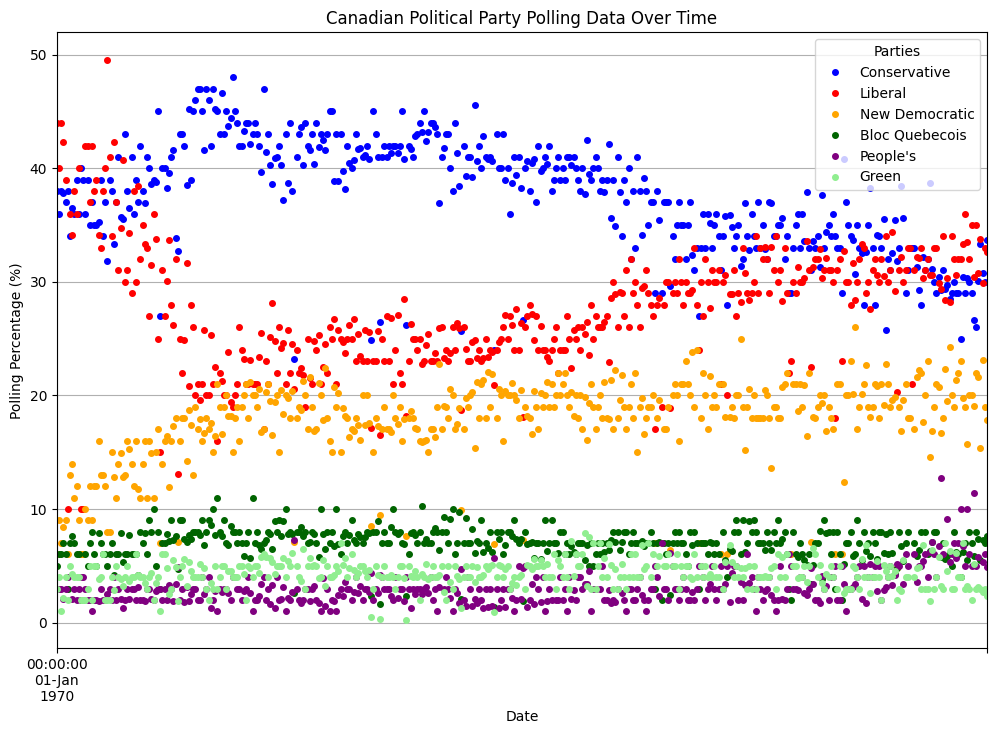

In [ ]:
end_date = pd.to_datetime('2025-01-13')
data.index = pd.to_datetime(data.index)
data_copy = data.copy()
data = data[data.index < end_date]
party_columns = ['CPC', 'LPC', 'NDP', 'BQ', 'PPC', 'GPC']
for col in party_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')


colors = {
    "CPC": "blue",
    "LPC": "red",
    "NDP": "orange",
    "BQ": "darkgreen",
    "GPC": "lightgreen",
    "PPC": "purple",
}

labels = {
    "CPC": "Conservative",
    "LPC": "Liberal",
    "NDP": "New Democratic",
    "BQ": "Bloc Quebecois",
    "GPC": "Green",
    "PPC": "People's",
}

filtered_data = data.sort_index()

ax = data[party_columns].plot(figsize=(12, 8), marker='o', linestyle='', markersize=4, color=[colors[col] for col in party_columns])
ax.set_title('Canadian Political Party Polling Data Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Polling Percentage (%)')
ax.legend([labels[col] for col in party_columns], title='Parties')
plt.grid(True)
plt.show()

In [ ]:
data['Winner'] = data[party_columns].idxmax(axis=1)
data['Winner_Percentage'] = data[party_columns].max(axis=1)
data[['Winner', 'Winner_Percentage']]

,Winner,Winner_Percentage
1970-01-01 00:00:00.000000000,LPC,44.0
1970-01-01 00:00:00.000000001,LPC,40.0
1970-01-01 00:00:00.000000002,LPC,44.0
1970-01-01 00:00:00.000000003,LPC,42.3
1970-01-01 00:00:00.000000004,LPC,39.0
...,...,...
1970-01-01 00:00:00.000000419,LPC,30.8
1970-01-01 00:00:00.000000420,LPC,33.8
1970-01-01 00:00:00.000000421,CPC,30.8
1970-01-01 00:00:00.000000422,LPC,33.0


In [ ]:

X = data[party_columns].copy()
y_winner = data['Winner'].copy()
y_percentage = data['Winner_Percentage'].copy()
X = X.fillna(X.mean())

tscv_final = TimeSeriesSplit(n_splits=20)
train_index, test_index = list(tscv_final.split(X))[-1]

X_train = X.iloc[train_index]
X_test = X.iloc[test_index]
y_train_winner = y_winner.iloc[train_index]
y_test_winner = y_winner.iloc[test_index]
y_train_perc = y_percentage.iloc[train_index]
y_test_perc = y_percentage.iloc[test_index]

In [ ]:
rf_model = RandomForestClassifier(n_estimators=20000, random_state=42, bootstrap=True, max_depth=20, min_samples_split=10)
rf_model.fit(X_train, y_train_winner)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=20000,
                       random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42, bootstrap=True)
rf_regressor.fit(X_train, y_train_perc)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
y_pred_winner = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test_winner, y_pred_winner)
print(f"Model Accuracy for Winner: {accuracy:.4f}")
print("\nClassification Report for Winner:")
print(classification_report(y_test_winner, y_pred_winner, digits=4))

Model Accuracy for Winner: 0.6500

Classification Report for Winner:
              precision    recall  f1-score   support

         CPC     0.3636    1.0000    0.5333         4
         LPC     1.0000    0.5625    0.7200        16

    accuracy                         0.6500        20
   macro avg     0.6818    0.7812    0.6267        20
weighted avg     0.8727    0.6500    0.6827        20



In [ ]:
y_pred_perc = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test_perc, y_pred_perc)
r2 = r2_score(y_test_perc, y_pred_perc)
print(f"\nRegressor MSE for Winner_Percentage: {mse:.4f}")
print(f"Regressor R² for Winner_Percentage: {r2:.4f}")


Regressor MSE for Winner_Percentage: 2.3558
Regressor R² for Winner_Percentage: 0.3842


In [ ]:
feature_importance = pd.DataFrame({
    'Party': party_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
  Party  Importance
1   LPC    0.518906
0   CPC    0.191865
2   NDP    0.140730
4   PPC    0.061360
3    BQ    0.057347
5   GPC    0.029792


In [ ]:
latest_polling = X.iloc[-1:].values

predicted_winner = rf_model.predict(latest_polling)[0]
predicted_winner_percentage = rf_regressor.predict(latest_polling)[0]

print(f"\nPredicted Election Winner: {predicted_winner}")
print(f"Predicted Winner Percentage: {predicted_winner_percentage:.2f}%")

predicted_probabilities = rf_model.predict_proba(latest_polling)[0]
print("\nPredicted Probabilities for Winner:")
for party, prob in zip(party_columns, predicted_probabilities):
    print(f"{party}: {prob:.4f}")


Predicted Election Winner: CPC
Predicted Winner Percentage: 33.68%

Predicted Probabilities for Winner:
CPC: 0.7356
LPC: 0.2644


In [ ]:
latest_polling_filtered = X.iloc[-1:].values

predicted_winner_filtered = rf_model.predict(latest_polling_filtered)[0]
predicted_winner_percentage_filtered = rf_regressor.predict(latest_polling_filtered)[0]

print(f"\nPredicted Election Winner (Filtered Data): {predicted_winner_filtered}")
print(f"Predicted Winner Percentage (Filtered Data): {predicted_winner_percentage_filtered:.2f}%")

predicted_probabilities_filtered = rf_model.predict_proba(latest_polling_filtered)[0]
print("\nPredicted Probabilities for Winner (Filtered Data):")
for party, prob in zip(party_columns, predicted_probabilities_filtered):
    print(f"{party}: {prob:.4f}")


Predicted Election Winner (Filtered Data): CPC
Predicted Winner Percentage (Filtered Data): 33.68%

Predicted Probabilities for Winner (Filtered Data):
CPC: 0.7356
LPC: 0.2644


Predictie pt datele complete:
Predicted Election Winner: LPC
Predicted Winner Percentage: 38.47%

Predicted Probabilities for Winner:
CPC: 0.3036
LPC: 0.6964

Observam ca ultima perioada ( pe care am exclus-o ) schimba total outcome-ul